### NOTE: In Deep Learning, the input vector is not (m, n) shape. Its reversed, i.e (n_x, m) shape. This means the features are rows and columns are examples. The y shape and w shape also changes accordingly as (1, m) and (n, 1). B is a scalar for logistic regression with single unit, Remember, deeplearning deals with 2d arrays also called matrices.
    Also check the W3 notebook to know how the W vector is taken after tranpose the W vector of hidden units, which is just the opposite of usual practice that we have seen in ML Specialization course.
    
    Keep in mind, we should not deal with rank 1 matrices.Change them into either row or column matrix

#### Building basic functions np.exp(), np.log(), np.reshape(), np.multiply() with numpy and element wise operations (+, - , *, /) with broadcasting
    Numpy is the main package for scientific computing in Python. In this exercise you will learn several key numpy functions such as np.exp, np.log, and np.reshape. You will need to know how to use these functions for future assignments.

###### sigmoid function and  np.exp()
    
    Before using np.exp(), you will use math.exp() to implement the sigmoid function. You will then see why np.exp() is preferable to math.exp().
    
    Exercise: Build a function that returns the sigmoid of a real number x. Use math.exp(x) for the exponential function.

    Reminder: sigmoid(x) = 1 / (1 + e^-x), is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.
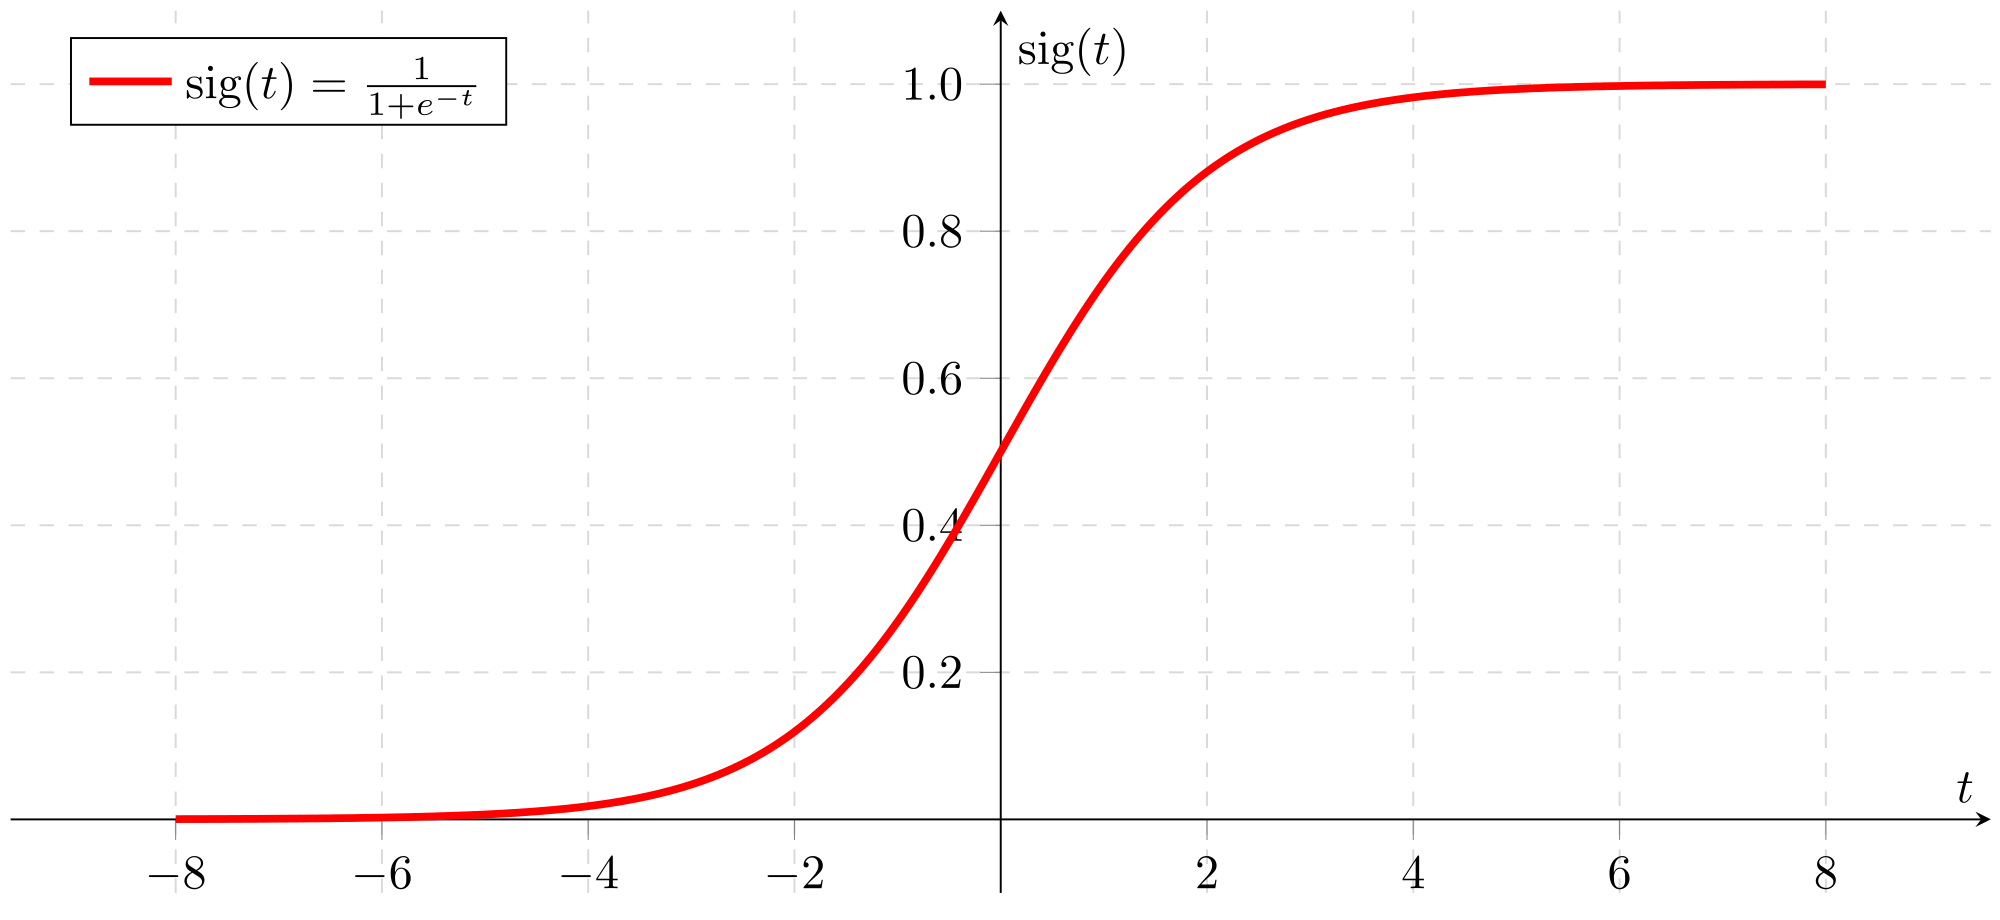

    To refer to a function belonging to a specific package you could call it using package_name.function(). Run the code below to see an example with math.exp().

In [2]:
import math
import time
import numpy as np

def basic_sigmoid(x):
    sig_g_x = 1 / (1 + math.exp(-x))
    return sig_g_x

In [16]:
x = 3

basic_sigmoid(x)

0.9525741268224334

    Actually, we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors. This is why numpy is more useful. If we pass an array to the basic_sigmoid math.exp() function, it throws an error "only size-1 arrays can be converted to Python scalars or bad operand type for unary -: 'list'"

In [3]:
### One reason why we use "numpy" instead of "math" in Deep Learning ###
x = [1, 2, 3]
print(x)
basic_sigmoid(x) # you will see this give an error when you run it, because x is a vector.

[1, 2, 3]


TypeError: bad operand type for unary -: 'list'

In [4]:
x = [1] #but works for np.arange(1, 2, 3)  which is array [1], one element vector

basic_sigmoid(x)

TypeError: bad operand type for unary -: 'list'

    In fact, with np.exp(), if X = (x1, x2, ,, xn) is a row vector then np.exp(X) will apply the exponential function to every element of X. The output will thus be: np.exp(X) = (e^x1, e^x2,.., e^xn)

In [28]:
import numpy as np

# example of np.exp
x = np.array([1, 2, 3]) #(3,)
print(x.shape)
print(np.exp(x)) # result is (exp(1), exp(2), exp(3))

(3,)
[ 2.71828183  7.3890561  20.08553692]


    Furthermore, if x is a vector, then a Python operation such as s = x + 3 or s = 1/x will output s as a vector of the same size as x.

In [29]:
# example of vector operation
x = np.array([1, 2, 3])
print(x + 3)

[4 5 6]


    You can also create a new cell in the notebook and write np.exp? (for example) to get quick access to the documentation.

In [30]:
np.exp?

##### Exercise: Implement the sigmoid function using numpy.

    Instructions: x could now be either a real number, a vector, or a matrix. The data structures we use in numpy to represent these shapes (vectors, matrices...) are called numpy arrays. You don't need to know more for now.
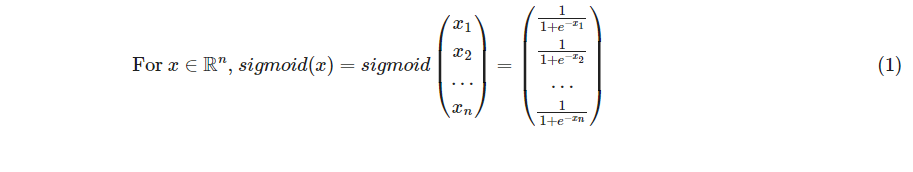

In [40]:
import numpy as np

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x       -- A scalar or numpy array of any size

    Return:
    sig_g_x -- sigmoid(x)
    """
    sig_g_x = 1 / (1 + np.exp(-x))
    return sig_g_x

In [36]:
x = np.array([0, 1, 2, 3]) # shape(3,) - vector or rank 1 matrix , also equal to np.arange(4)
sigmoid(x)

#Note: 
#rank 1 matrix (eg shape (4,)) is different from row vector (eg shape (1, 4)) or column vector (eg shape  (4, 1)). Do not use rank 1 matrices.
#Always convert them to row or column vector as per your convenience. Cux some operations results in scalar when vector is needed when using rank 1 vector. SO avoud them.
#Always use inexpensive operations like assert statements or reshape to make sure the dimensions are right
#Make sure to explicitly mention the vector as column vector or row vector when there is a possibility of rank 1 matrix

array([0.5       , 0.73105858, 0.88079708, 0.95257413])

In [13]:
#some example of effect of rank 1 matrix
import numpy as np
a = np.array([1, 2, 3]) #3,
print(a.shape)
prod = np.dot(a.T, a) 
print(a.T.shape)
print(prod)

a = np.array([[1], [2], [3]]) # 3, 1
prod = np.dot(a, a.T)
print(prod)

a = np.array([[1, 2, 3]]) # 1, 3
prod = np.dot(a.T, a)
print(prod)

(3,)
(3,)
14
[[1 2 3]
 [2 4 6]
 [3 6 9]]
[[1 2 3]
 [2 4 6]
 [3 6 9]]


In [34]:
x = np.random.randn(2, 3) #2d array or matrix
sigmoid(x)

array([[0.42309186, 0.11921263, 0.59473495],
       [0.57388956, 0.65036723, 0.52265835]])

In [37]:
x = np.random.randn(2,) #rank 1 matrix
print(x.shape)
sigmoid(x)

(2,)


array([0.70027986, 0.58820645])

In [38]:
x = np.random.randn(2, 1) #column vector
print(x.shape)
sigmoid(x)

(2, 1)


array([[0.83265646],
       [0.2344134 ]])

In [39]:
x = np.random.randn(1, 2) #row vector
print(x.shape)
sigmoid(x)

(1, 2)


array([[0.76662406, 0.87147438]])

In [41]:
x = 3 #scalar
sigmoid(x)

0.9525741268224334

##### 1.2 - Sigmoid gradient
    As you've seen in lecture, you will need to compute gradients to optimize loss functions using backpropagation. Let's code your first gradient function.

    Exercise: Implement the function sigmoid_derivative() to compute the gradient of the sigmoid function with respect to its input x. The formula is:  
                  sigmoid_derivative(x) = σ'(x) = σ(x)(1 - σ(x))

    You often code this function in two steps:

        1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful.
        2. Compute σ'(x) = s(1- s)
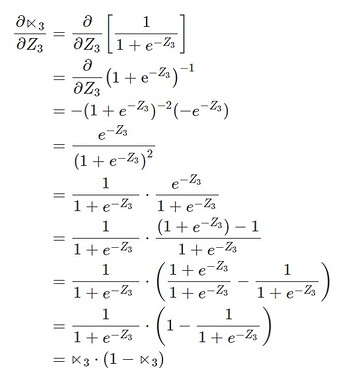
   

In [46]:
def sigmoid_derivative(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.
    
    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """
    s = sigmoid(x)
    ds = s * (1 - s)
    return ds

In [47]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


##### 1.3 - Reshaping arrays
    Two common numpy functions used in deep learning are np.shape and np.reshape().

    X.shape is used to get the shape (dimension) of a matrix/vector X.
    X.reshape(...) is used to reshape X into some other dimension.
    For example, in computer science, an image is represented by a 3D array of shape (length, height, depth=3).
    (length is also called width, which is the horizontal line, and height is vertical, depth represent color channel)
    However, when you read an image as the input of an algorithm you convert it to a vector of shape (length*height*3, 1) a column vector. unrolling and concatenating all the color channels pixels of a single image into a column vector.
    In other words, you "unroll", or reshape, the 3D array into a 2D vector.
    
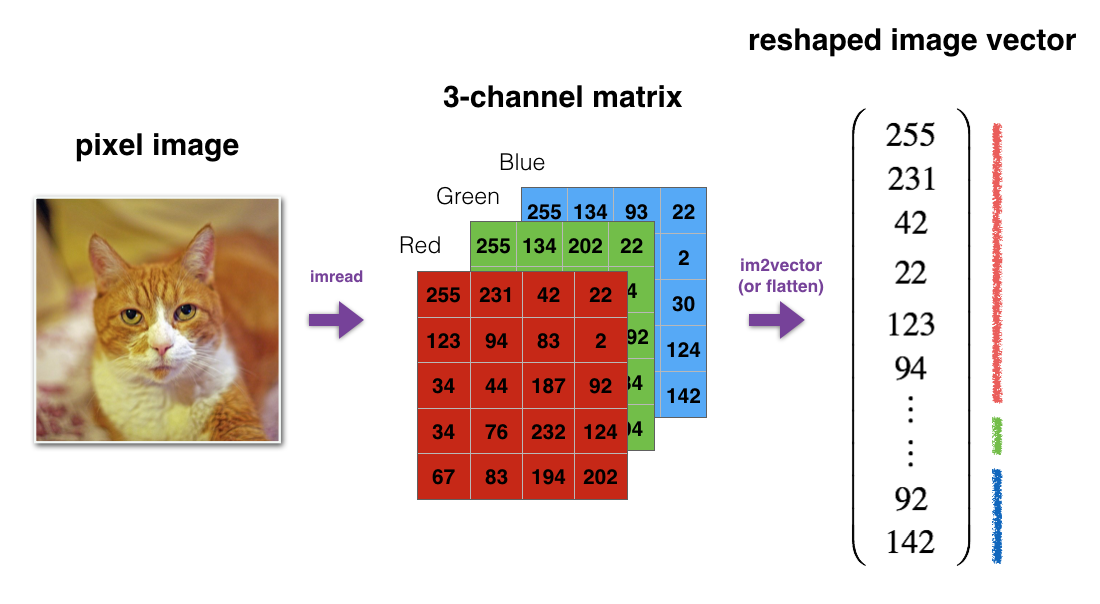


https://dev.to/sandeepbalachandran/machine-learning-going-furthur-with-cnn-part-2-41km



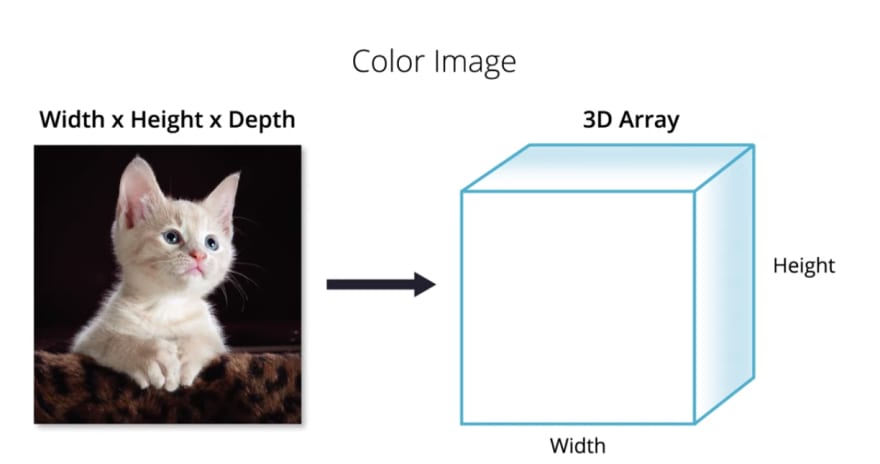

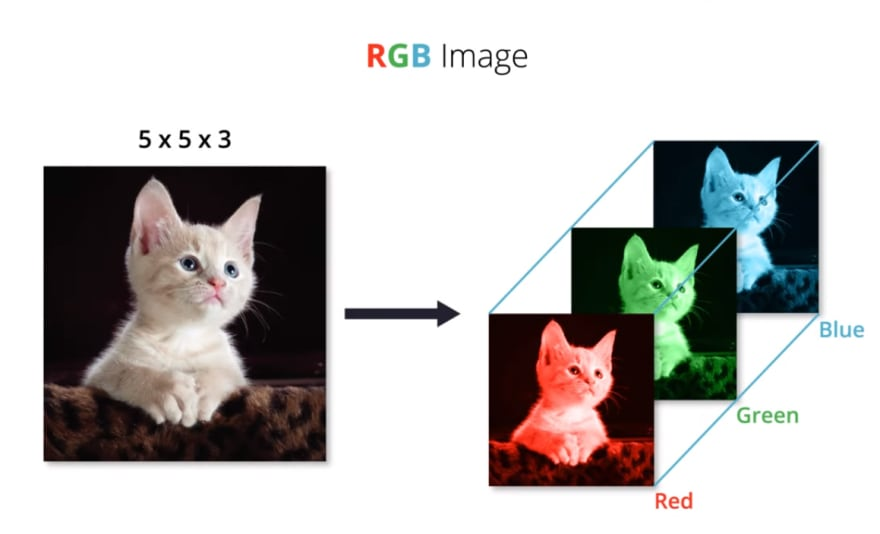

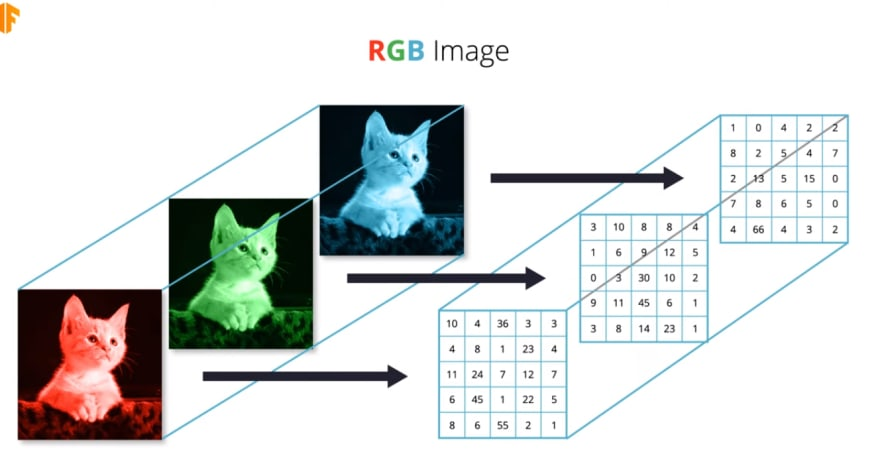

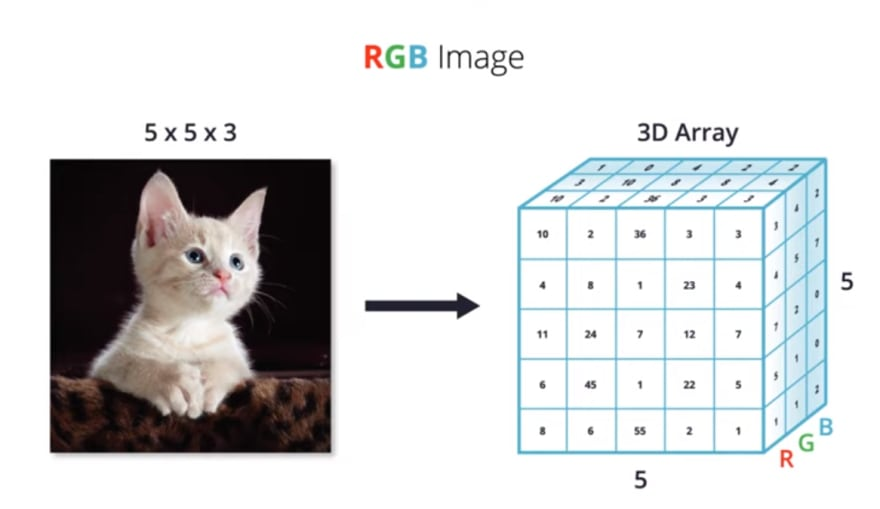

###### Exercise: 
    Implement image2vector() that takes an input of shape (length, height, 3) and returns a vector of shape (length*height*3, 1). For example, if you would like to reshape an array v of shape (a, b, c) into a vector of shape (a*b,c) you would do:

    v = v.reshape((v.shape[0]*v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c

    Please don't hardcode the dimensions of image as a constant. Instead look up the quantities you need with image.shape[0], etc.


In [51]:
def image2vector(img):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    print(img.shape)
    img_vec = img.reshape(img.shape[0] * img.shape[1] * img.shape[2], 1)
    return img_vec

In [49]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y, 3) where 3 represents the RGB values
image = np.array([
        [[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

In [53]:
print("image2vector(image) = \n" + str(image2vector(image))) #unrolling

(3, 3, 2)
image2vector(image) = 
[[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


    Keep in mind that pixel intensity values are usually between 0 and 1 for normalized images. If you're working with images where pixel values are in the range of 0 to 255, and you need to normalize them

##### 1.4 - Normalizing rows
    Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. Here, by normalization we mean changing x to 
    x / ||x|| (dividing each row vector of x by its norm) (euclidean or l2 norm)

    For example, if                     
                            x =  ⌈ 0 3 4 ⌉
                                 ⌊ 2 6 4 ⌋
                               
    then
                           ||x|| = np.linalg.norm(x, axis=1, keepdims=True) = ⌈  5  ⌉
                                                                              ⌊ √56 ⌋ 

    and          
                        x_normalized = x / ||x|| 
                        
                                     = ⌈ 0      3/5   4/5   ⌉
                                       ⌊ 2/√56 6/√56  4/√56 ⌋  
                                                    
            
    Note that you can divide matrices of different sizes and it works fine: this is called broadcasting and you're going to learn about it in part 5.

    Exercise: Implement normalizeRows() to normalize the rows of a matrix. After applying this function to an input matrix x, each row of x should be a vector of unit length (meaning length 1)(unit norm)

In [73]:
def normalizeRows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).
    
    Argument:
    x -- A numpy matrix of shape (n, m)
    
    Returns:
    x -- The normalized (by row) numpy matrix. You are allowed to modify x.
    """
    print(x.shape)
    # Compute x_norm as the norm 2 of x. Use np.linalg.norm(..., ord = 2, axis = ..., keepdims = True)
    x_norm = np.linalg.norm(x, axis=1, keepdims=1) #normalizing across the rows
    print(x_norm.shape)
    # Divide x by its norm
    x = x / x_norm
    print(x.shape)
    return x

In [74]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]
])
print("normalized x : " + str(normalizeRows(x)))

(2, 3)
(2, 1)
(2, 3)
normalized x : [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


     Note: In normalizeRows(), you can try to print the shapes of x_norm and x, and then rerun the assessment. You'll find out that they have different shapes. This is normal given that x_norm takes the norm of each row of x. So x_norm has the same number of rows but only 1 column. So how did it work when you divided x by x_norm? This is called broadcasting and we'll talk about it now!

#### keepdims and axis parameter
    If you used np.sum() to do the summation, using the keepdims, axis arguments gives different results. Lets see their effects

In [5]:
A = np.random.randn(1,4)
print(f"type(A) {type(A)}")
print(f"A.shape = {A.shape}")
print(f"A = {A}")

sumA = np.sum(A, axis = 1, keepdims = True) #retain the dimesions(like 2d [[]] or 3d[[[]]] of the original axis)
print(f"type(sumA) {type(sumA)}")
print(f"sumA.shape = {sumA.shape}")
print(f"sumA = {sumA}")

sumA = np.sum(A, axis = 1)
print(f"type(sumA) {type(sumA)}")
print(f"sumA.shape = {sumA.shape}")
print(f"sumA = {sumA}")

sumA = np.sum(A)
print(f"type(sumA) {type(sumA)}")
print(f"sumA = {sumA}")

type(A) <class 'numpy.ndarray'>
A.shape = (1, 4)
A = [[-0.70651107 -0.56516544 -0.3356347  -1.61252505]]
type(sumA) <class 'numpy.ndarray'>
sumA.shape = (1, 1)
sumA = [[-3.21983626]]
type(sumA) <class 'numpy.ndarray'>
sumA.shape = (1,)
sumA = [-3.21983626]
type(sumA) <class 'numpy.float64'>
sumA = -3.219836257229754


   

##### 1.5 - Broadcasting and the softmax function
    A very important concept to understand in numpy is "broadcasting". It is very useful for performing mathematical operations between arrays of different shapes. For the full details on broadcasting, you can read the official broadcasting documentation or check the ML Specialization course

    Exercise: Implement a softmax function using numpy. You can think of softmax as a normalizing function used when your algorithm needs to classify two or more classes. You will learn more about softmax in the second course of this specialization.
    
    Note:
    Note that later in the course, you'll see "m" used to represent the "number of training examples", and each training example is in its own column of the matrix.
    Also, each feature will be in its own row (each row has data for the same feature).
    
     Simply,
    - Here in deep learning, the X matrix is reveresed with rows containing n (or n_x) features and columns contaning m training examples
    - So, W is of shape (n, 1) # a column vector
    - b is a scalar
    - target y is a row vector of shape (1, m)
    
    Softmax should be performed for all features of each training example, so softmax would be performed on the columns (once we switch to that representation later in this course).

    However, in this coding practice, we're just focusing on getting familiar with Python, so we're using the common math notation 

    where m is the number of rows and n is the number of columns.

In [81]:
def softmax(x):
    """Calculates the softmax for each row of the input x.

    Your code should work for a row vector and also for matrices of shape (m, n).

    Argument:
    x -- A numpy matrix of shape (m, n)

    Returns:
    s -- A numpy matrix equal to the softmax of x, of shape (m, n)
    """
    #imagine x as our z
    # Apply exp() element-wise to x. Use np.exp(...).
    x_exp = np.exp(x)                                    #m, n
    print(x_exp.shape)
    
    # Create a vector x_sum that sums each row of x_exp.
    #Use np.sum(..., axis = 1, keepdims = True).
    x_sum = np.sum(x_exp, axis=1, keepdims=True)            #m, 1 
    print(x_sum.shape)
    
    ## Compute softmax(x) by dividing x_exp by x_sum.
    #It should automatically use numpy broadcasting.
    s = x_exp / x_sum                                     #m, n 
    print(s.shape)
    return s

In [82]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x) = " + str(softmax(x)))

(2, 5)
(2, 1)
(2, 5)
softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


    Note: If you print the shapes of x_exp, x_sum and s above and rerun the assessment cell, you will see that x_sum is of shape (2,1) while x_exp and s are of shape (2,5). x_exp/x_sum works due to python broadcasting.

    Congratulations! You now have a pretty good understanding of python numpy and have implemented a few useful functions that you will be using in deep learning.

 **What you need to remember:** 
 - np.exp(x) works for any np.array x and applies the exponential function to every coordinate 
 - the sigmoid function and its gradient 
 - image2vector is commonly used in deep learning 
 - np.reshape is widely used. 
 
      In the future, you'll see that keeping your matrix/vector dimensions straight will go toward eliminating a lot of bugs. 
      - numpy has efficient built-in functions 
      - broadcasting is extremely useful

##### 2) Vectorization
    In deep learning, you deal with very large datasets. Hence, a non-computationally-optimal function can become a huge bottleneck in your algorithm and can result in a model that takes ages to run. To make sure that your code is computationally efficient, you will use vectorization. For example, try to tell the difference between the following implementations of the dot/outer/elementwise product.

In [6]:
import time

x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### CLASSIC DOT PRODUCT OF VECTORS IMPLEMENTATION ###
#sum of element wise multiplications, returns scalar value
tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot += x1[i] * x2[i]
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

dot = 278
 ----- Computation time = 0.0ms


In [86]:
### CLASSIC OUTER PRODUCT IMPLEMENTATION ###
#each element in frst matrix is multiplied by every other element of second matrix, returns matrix
tic = time.process_time()
outer = np.zeros((len(x1), len(x2))) # we create a len(x1)*len(x2) matrix with only zeros
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i, j] = x1[i] * x2[j]
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

outer = [[81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 14. 14. 63.  0. 63. 14. 35.  0.  0. 63. 14. 35.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
 ----- Computation time = 0.0ms


In [87]:
### CLASSIC ELEMENTWISE MULTIPLICATION IMPLEMENTATION ### 
#final matrix/vector has a shape after applying broadcastung rule
tic = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i] * x2[i]
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

elementwise multiplication = [81.  4. 10.  0.  0. 63. 10.  0.  0.  0. 81.  4. 25.  0.  0.]
 ----- Computation time = 0.0ms


In [8]:
### CLASSIC GENERAL DOT PRODUCT IMPLEMENTATION ###
W = np.random.rand(3, len(x1)) # Random (3,15) numpy 2d array
print(W)
tic = time.process_time()
gdot = np.zeros(W.shape[0])
print(gdot.shape)
for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i, j] * x1[j] #ith row jth column
toc = time.process_time()
print ("gdot = " + str(gdot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

[[0.99724465 0.61831929 0.88723584 0.37155314 0.55068167 0.26858883
  0.13869518 0.3055994  0.90875536 0.95577418 0.54279403 0.56847006
  0.31980715 0.08791293 0.1075669 ]
 [0.24638913 0.22680639 0.94947968 0.67550187 0.16566487 0.27916327
  0.14619488 0.85570843 0.22820093 0.85052954 0.15185631 0.32680428
  0.88448336 0.47072249 0.84826873]
 [0.1094051  0.83010711 0.71342034 0.69504232 0.57605463 0.41133538
  0.93722254 0.69223809 0.48861855 0.88465132 0.87136576 0.1988042
  0.05984903 0.59006132 0.37315234]]
(3,)
gdot = [24.84273948 16.5463628  22.31656757]
 ----- Computation time = 0.0ms


In [9]:
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### VECTORIZED DOT PRODUCT OF VECTORS ###
tic = time.process_time()
dot = np.dot(x1, x2)
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

dot = 278
 ----- Computation time = 0.0ms


In [10]:
### VECTORIZED OUTER PRODUCT ###
tic = time.process_time()
outer = np.outer(x1, x2)
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

outer = [[81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [63 14 14 63  0 63 14 35  0  0 63 14 35  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
 ----- Computation time = 0.0ms


In [11]:
### VECTORIZED ELEMENTWISE MULTIPLICATION ###
tic = time.process_time()
mul = np.multiply(x1, x2)
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

elementwise multiplication = [81  4 10  0  0 63 10  0  0  0 81  4 25  0  0]
 ----- Computation time = 0.0ms


In [12]:
### VECTORIZED GENERAL DOT PRODUCT ###
tic = time.process_time()
dot = np.dot(W, x1)
toc = time.process_time()
print ("gdot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

gdot = [24.84273948 16.5463628  22.31656757]
 ----- Computation time = 0.0ms


    As you may have noticed, the vectorized implementation is much cleaner and more efficient. For bigger vectors/matrices, the differences in running time become even bigger.

    Note that np.dot() performs a matrix-matrix or matrix-vector multiplication. This is different from np.multiply() or the * operator (which is equivalent to .* in Matlab/Octave), which performs an element-wise multiplication.

##### 2.1 Implement the L1 and L2 loss functions
    Exercise: Implement the numpy vectorized version of the L1 loss. You may find the function abs(x) (absolute value of x) useful.

    Reminder:

    The loss is used to evaluate the performance of your model. The bigger your loss is, the more different your predictions (y^ or f(X)) are from the true values (y). In deep learning, you use optimization algorithms like Gradient Descent to train your model and to minimize the cost.
    L1 loss is defined as: L1(y^, y) = Σ |yi - yi^| where i tends from 0 to m

In [91]:
def L1(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L1 loss function defined above
    """
    
    loss = sum(abs(yhat - y))
    return loss

In [92]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1(yhat, y)))

L1 = 1.1


#### Exercise: 
    Implement the numpy vectorized version of the L2 loss. There are several way of implementing the L2 loss but you may find the function np.dot() useful. As a reminder, if x = [x1, x2, .., xn], then np.dot(x, x) = Σ xj^2 where j tends from 0 to n.

    L2 loss is defined as L2(y, y^) = Σ (yi - yi^)^2
 
 

In [93]:
def L2(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L2 loss function defined above
    """
    x = yhat - y
    loss = np.dot(x, x)
    return loss

In [94]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L2 = " + str(L2(yhat, y)))

L2 = 0.43


    Congratulations on completing this assignment. We hope that this little warm-up exercise helps you in the future assignments, which will be more exciting and interesting!

**What to remember:** - Vectorization is very important in deep learning. It provides computational efficiency and clarity. - You have reviewed the L1 and L2 loss. - You are familiar with many numpy functions such as np.sum, np.dot, np.multiply, np.maximum, etc...

#### Matrices Info
    https://www.mathsisfun.com/algebra/matrix-introduction.html
    https://www.mathsisfun.com/algebra/matrix-inverse.html
    https://mathinsight.org/logarithm_basics4
    https://portal.tpu.ru/SHARED/k/KONVAL/Sites/English_sites/Site3_M/6/6_10.htm

    It is said that the logarithm is a monotonically increasing function, hence the logarithm of a function achieves its maximum value at the same points as the function itself.

    Is there a similar property for monotonically decreasing functions and minimization, e.g, the minimum points for f(x) and e^−f(x) are the same?

    Let f be some function

    If g (for eg log) is strictly monotonically increasing, then g(f(x)) has the same minimizer and maximizer as f(x)
    If g is strictly monotonically decreasing, then the minimizers of g(f(x)) are the maximizer of f(x) and the maximizers of g(f(x))
    are the minimizer of f(x)

    In simple words, increasing preserves order but decreasing reverses order